# Using `AdherR` from a `Python3` Jupyter Notebook using the custom wrapper

We use here the `Python3` wrapper included with the `AdhereR` package to compute and plot CMA7 from a `Python3` `Jupyter Notebook`...
Please make sure that you have the R AdhereR package properly installed and that Python can find the adherer module. This can be done in various ways.

The wrapper is contained in single file (`adherer.py`) included with the `R` `AdhereR` package and whose location can be obtained using the function `getCallerWrapperLocation(full.path=TRUE)` from `AdhereR` (*N.B.* it is located in the directory where the `AdhereR` package is installed on the system, subdirectory `wrappers/python3/adherer.py`; for example, on the example `macos` machine this is `/Library/Frameworks/R.framework/Versions/3.4/Resources/library/AdhereR/wrappers/python3/adherer.py`).
In the future, as more wrappers are added, the argument `callig.platform` will allow the selection of the desired wrapper (now it is implicitely set to `python3`).

This file can be either:

  - *copied and placed* in `Python`'s "module search paths" (a list of directories comprising, in order, the directory contining the input script, the environment variable `PYTHONPATH`, and a default location; see [here](https://docs.python.org/3/tutorial/modules.html#the-module-search-path) for details), in which cae it can be simply imported using the standard `Python` syntax (e.g. `import adherer` or `import adherer as ad`), or
  - *imported from its location* by either:
    - adding its directory to the `PYTHONPATH` environment variable [the recommended solution], or
    - using various tricks described, for example, [here](https://stackoverflow.com/a/67692).

On the example `macos` machine, this can be achieved by adding:
``` bash
# Add AdhereR to PYTHONPATH
export PYTHONPATH=$PYTHONPATH:/Library/Frameworks/[...]/AdhereR/wrappers/python3
```
to the `.bash_profile` file in the user's home folder (if this file does not exist, then it can be created using a text editor such as `nano`; please note that the `[...]` are for shortening the path and should be replaced by the actual path given in full above).
The process should be very similar on `Linux`, while on `MS Windows` one should use the system's "Environment Variables" settings (for example, see [here](https://stackoverflow.com/a/4855685) for details).

Please note that `adherer` needs `pandas` and `PIL`, which can be installed, for example, using:
``` bash
pip3 install pandas
pip3 install Pillow
```



In [1]:
# import the adherer python module (see above about how to make it findable)
import adherer

Le chargement a nécessité le package : AdhereR


In [2]:
# load the test dataset:
import pandas
df = pandas.read_csv('./test-dataset.csv', sep='\t', header=0)

# Change the column names:
df.rename(columns={'ID': 'patientID',
                   'DATE': 'prescriptionDate',
                   'PERDAY': 'quantityPerDay',
                   'CLASS': 'medicationType',
                   'DURATION': 'prescriptionDuration'},
          inplace=True)

In [3]:
# check the file was read correctly
type(df)

pandas.core.frame.DataFrame

In [4]:
# HTML printing of data frames
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

# print it
df

,patientID,prescriptionDate,quantityPerDay,medicationType,prescriptionDuration
0,1,04/26/2033,4,medA,50
1,1,07/04/2033,4,medB,30
2,1,08/03/2033,4,medB,30
3,1,08/17/2033,4,medB,30
4,1,10/13/2033,4,medB,30
...,...,...,...,...,...
1075,100,03/05/2034,6,medB,30
1076,100,04/07/2034,6,medB,30
1077,100,04/26/2034,6,medB,30
1078,100,05/26/2034,6,medB,30


In [5]:
# create a CMA7 object
cma7 = adherer.CMA7(df,
                    id_colname='patientID',
                    event_date_colname='prescriptionDate',
                    event_duration_colname='prescriptionDuration',
                    event_daily_dose_colname='quantityPerDay',
                    medication_class_colname='medicationType',
                    followup_window_start=230,
                    followup_window_duration=705,
                    observation_window_start=41,
                    observation_window_duration=100,
                    date_format="%m/%d/%Y",
                    suppress_warnings=True)

Le chargement a nécessité le package : AdhereR


OK: the results were exported successfully (but there might be warnings and messages above worth paying attention to)!
Adherer returned code 0 and said:
AdhereR 0.7.1 on R 4.1.3 started at 2022-05-31 17:26:00:
OK: the results were exported successfully (but there might be warnings and messages above worth paying attention to)!



In [6]:
# print it for checking
cma7

CMA object of type CMA7 (on 1080 rows).

In [7]:
# print the estimated CMAs
cma7.get_cma()

,patientID,CMA
0,1,1.00
1,2,0.35
2,3,0.93
3,4,NaN
4,5,0.30
...,...,...
95,96,1.00
96,97,0.36
97,98,0.33
98,99,0.70


In [9]:
# do the plotting (and store the result for showing it later)
x = cma7.plot(patients_to_plot=['1', '2', '3'],
              save_as="jpg",
              width=7, height=7,
              quality=90, dpi=92, 
              align_all_patients=True,
              show_legend=True,
              suppress_warnings=True)

Le chargement a nécessité le package : AdhereR


OK: the results were exported successfully (but there might be warnings and messages above worth paying attention to)!
Adherer returned code 0 and said:
AdhereR 0.7.1 on R 4.1.3 started at 2022-05-31 17:28:38:
OK: the results were exported successfully (but there might be warnings and messages above worth paying attention to)!



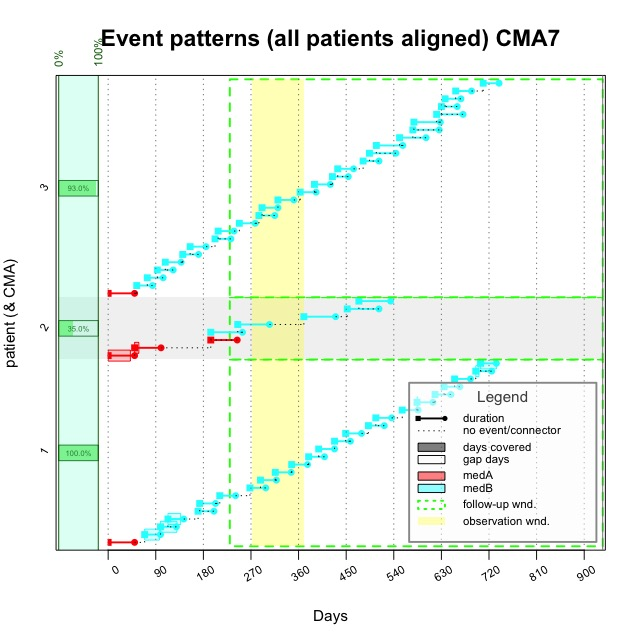

In [10]:
# show the plot directly in the notebook
x